Binary cross entropy = One of the most beautiful formual.

BCE = actual*log(pred) + (1-actual)*log(1-pred)


The Chain of Dependencies:

BCE = - [y·log(ŷ) + (1-y)·log(1-ŷ)]

ŷ = σ(z) (where σ is the sigmoid function)

z = ax + b

Our goal is to find ∂BCE/∂a. The chain rule tells us:
∂BCE/∂a = (∂BCE/∂ŷ) * (∂ŷ/∂z) * (∂z/∂a)

Let's find each of the three pieces.

Piece 1: ∂z/∂a (How z changes with a)
This is the easy one. The derivative of z = ax + b with respect to a is just x.

∂z/∂a = x

Piece 2: ∂ŷ/∂z (How ŷ changes with z)
This is the derivative of the sigmoid function, σ(z). It has a very convenient property: its derivative is σ(z) * (1 - σ(z)). Since ŷ = σ(z), we can write:

∂ŷ/∂z = ŷ * (1 - ŷ)

Piece 3: ∂BCE/∂ŷ (How the Loss changes with ŷ)
This is the most involved derivative. We differentiate the BCE formula with respect to ŷ:
∂/∂ŷ [ - (y·log(ŷ) + (1-y)·log(1-ŷ)) ]
= - [ y/ŷ + (1-y) * (1/(1-ŷ)) * (-1) ]
= - [ y/ŷ - (1-y)/(1-ŷ) ]
Now, find a common denominator ŷ(1-ŷ):
= - [ y(1-ŷ) - (1-y)ŷ ] / [ ŷ(1-ŷ) ]
= - [ y - yŷ - ŷ + yŷ ] / [ ŷ(1-ŷ) ]
The -yŷ and +yŷ terms cancel out!
= - [ y - ŷ ] / [ ŷ(1-ŷ) ]
= (ŷ - y) / (ŷ(1-ŷ))

∂BCE/∂ŷ = (ŷ - y) / (ŷ(1-ŷ))

Putting It All Together

Now we multiply our three pieces:
∂BCE/∂a = [ (ŷ - y) / (ŷ(1-ŷ)) ] * [ ŷ * (1-ŷ) ] * [ x ]

Look closely! The (ŷ(1-ŷ)) in the denominator of the first term cancels out perfectly with the (ŷ(1-ŷ)) in the second term. This is the beautiful simplification that answers your first question.

After cancellation, we are left with:
∂BCE/∂a = (ŷ - y) * x

Since we want to do this for all our data points, we sum them up:
∂BCE/∂a = ∑(xi(ŷi - yi))


For the b gradient: The process is identical, except for the last piece of the chain rule: ∂z/∂b.
The derivative of z = ax + b with respect to b is simply 1.
So the final result is:
∂BCE/∂b = (ŷ - y) * 1 = (ŷ - y)
And summed over all data points:
∂BCE/∂b = ∑(ŷi - yi)






In [2]:
import numpy as np

x = [1, 2, 3, 4, 5]

y = [0, 0, 0, 1, 1]


def segmoid_function(point):
    return 1 / (1 + np.exp(-point))

def gradient_descent_logistic(x, y, learning_rate=0.1, iterations=1000):
    a = 0
    b = 0

    for i in range(iterations):
        a_grad = 0
        b_grad = 0

        for xi, yi in zip(x, y):
            y_pred = segmoid_function(a*xi+b)
            a_grad += xi * (y_pred - yi)
            b_grad += (y_pred - yi) 
        
        a -= learning_rate*(a_grad/len(x))
        b -= learning_rate*(b_grad/len(x))
    return a, b




a, b = gradient_descent_logistic(x, y)

print(a, b)

1.769045864973106 -5.956350539118638


1.769045864973106 -5.956350539118638


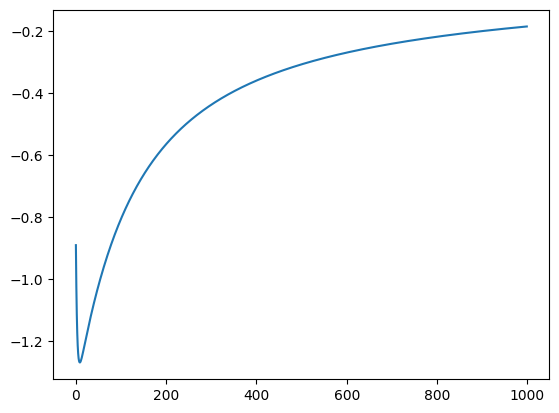

In [ ]:

# with error tracking

import numpy as np
import matplotlib.pyplot as plt


x = [1, 2, 3, 4, 5]

y = [0, 0, 0, 1, 1]

BCE_values = []
def segmoid_function(point):
    return 1 / (1 + np.exp(-point))

def gradient_descent_logistic(x, y, learning_rate=0.1, iterations=1000):
    a = 0
    b = 0

    for i in range(iterations):
        a_grad = 0
        b_grad = 0

        for xi, yi in zip(x, y):
            y_pred = segmoid_function(a*xi+b)
            a_grad += xi * (y_pred - yi)
            b_grad += (y_pred - yi) 


        
        a -= learning_rate*(a_grad/len(x))
        b -= learning_rate*(b_grad/len(x))

        error = 0
        for xi, yi in zip(x, y):
            y_pred = segmoid_function(a*xi+b)
            error += -((yi*np.log(y_pred)) + (1-yi)*np.log(1-y_pred))
        BCE_values.append(error)
    return a, b, BCE_values

a, b, BCE_values = gradient_descent_logistic(x, y)
plt.plot(BCE_values)
print(a, b)